# Telecom Churn Prediction
<br>
<font color = blue>
In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist,  task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data. 
</font>
</br>

<br>The solution is divided into the following sections:

- Data Understanding, Preparation, and Pre-Processing
- Exploratory Data Analysis 
- Feature Engineering and Variable Transformation
- Model Selection, Model Building, and  Prediction 

### 1.Data Understanding, Preparation, and Pre-Processing

Let's first have a look at the dataset and understand the size, attribute names etc.

In [251]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)

In [252]:
# reading the train dataset

df_train = pd.read_csv("train.csv")
df_train.shape

(69999, 172)

There are 69999 rows and 172 columns.

In [253]:
df_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

This shows that there are many null values present.

In [254]:
# reading the test dataset

df_test = pd.read_csv("test.csv")
df_test.shape

(30000, 171)

There are 30000 rows and 171 columns.

In [255]:
df_test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            29684 non-null  float64
 3    std_og_t2o_mou            29684 non-null  float64
 4    loc_ic_t2o_mou            29684 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    last_date_of_month_8      29633 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   onnet_mou_6               28831 non-null  float64
 12   onnet_mou_7               28828 non-null  float64
 13   onnet_mou_8               28325 non-null  fl

We can see that no of columns in test data is 1 less than no of columns in train dataset. Lets find out which one is that.

In [256]:
df_train.columns.symmetric_difference(df_test.columns)

Index(['churn_probability'], dtype='object')

Since churn probability is missing from the test dataset, we cannot merge these two dataframes.
<br> Hence we will use train data here.

In [257]:
# let's look at the statistical aspects of the dataframe

df_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [258]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

We can see that there are :
- many fields related to date which are of data type object
- many fileds related to recharge
- few columns have month as number appended at the end, while few have name prefixed.
- there is a `id` and `circle_id` columns
- `churn_probability` is the target variable

### Data Cleaning

since we have some null values, let's now conduct some data cleaning steps. 

In [259]:
# duplicacy check

df_train["id"].is_unique

True

This means that no two Ids are same, hence we have all rows unique.

Lets now check if there is any column which has same value in all rows.

In [260]:
same_value_columns = []
for col in df_train.columns:
    if df_train[col].nunique() == 1:
        same_value_columns.append(col)
        
print(same_value_columns)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


Since these columns will not help in any model building, hence we can delete them.

In [261]:
df_train = df_train.drop( columns = same_value_columns)
df_train.shape

(69999, 159)

Now we have 159 columns.

Let us check the percentage of null values.

In [262]:
print(round(df_train.isnull().sum()/len(df_train.index)*100,2).sort_values(ascending=False))

arpu_3g_6                   74.90
night_pck_user_6            74.90
total_rech_data_6           74.90
max_rech_data_6             74.90
date_of_last_rech_data_6    74.90
count_rech_2g_6             74.90
av_rech_amt_data_6          74.90
fb_user_6                   74.90
count_rech_3g_6             74.90
arpu_2g_6                   74.90
total_rech_data_7           74.48
fb_user_7                   74.48
count_rech_2g_7             74.48
max_rech_data_7             74.48
count_rech_3g_7             74.48
av_rech_amt_data_7          74.48
arpu_2g_7                   74.48
night_pck_user_7            74.48
date_of_last_rech_data_7    74.48
arpu_3g_7                   74.48
total_rech_data_8           73.69
arpu_2g_8                   73.69
max_rech_data_8             73.69
count_rech_2g_8             73.69
count_rech_3g_8             73.69
av_rech_amt_data_8          73.69
night_pck_user_8            73.69
fb_user_8                   73.69
arpu_3g_8                   73.69
date_of_last_r

We can see there are many columns with more than 70% missing values. 

Lets find out the date type columns:

In [263]:
date_type_columns = df_train.dtypes[df_train.dtypes =='object'].index
print("Number of date_type_columns : " ,len(date_type_columns))
print("date_type_columns : ",date_type_columns)

Number of date_type_columns :  6
date_type_columns :  Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


Lets convert these to date time type.

In [264]:
for col in date_type_columns:
    df_train[col] = pd.to_datetime(df_train[col])

df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 159 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    id                        int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    onnet_mou_6               float64       
 5    onnet_mou_7               float64       
 6    onnet_mou_8               float64       
 7    offnet_mou_6              float64       
 8    offnet_mou_7              float64       
 9    offnet_mou_8              float64       
 10   roam_ic_mou_6             float64       
 11   roam_ic_mou_7             float64       
 12   roam_ic_mou_8             float64       
 13   roam_og_mou_6             float64       
 14   roam_og_mou_7             float64       
 15   roam_og_mou_8             float64       
 16   loc_og_t2t_mou_6          float64     

Deleting date columns as these are not required in our dataset.

In [265]:
df_train = df_train.drop(date_type_columns, axis=1)

Next lets seperate the recharge related columns and look into the data.

In [266]:
recharge_columns = df_train.columns[df_train.columns.str.contains('rech')]
print(recharge_columns)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')


Now we can find out the percentage of null values in these columns.

In [267]:
recharge_missing_values = round(df_train.loc[:,recharge_columns].isnull().sum()/len(df_train)*100,2)
print(pd.DataFrame(recharge_missing_values))

                        0
total_rech_num_6     0.00
total_rech_num_7     0.00
total_rech_num_8     0.00
total_rech_amt_6     0.00
total_rech_amt_7     0.00
total_rech_amt_8     0.00
max_rech_amt_6       0.00
max_rech_amt_7       0.00
max_rech_amt_8       0.00
total_rech_data_6   74.90
total_rech_data_7   74.48
total_rech_data_8   73.69
max_rech_data_6     74.90
max_rech_data_7     74.48
max_rech_data_8     73.69
count_rech_2g_6     74.90
count_rech_2g_7     74.48
count_rech_2g_8     73.69
count_rech_3g_6     74.90
count_rech_3g_7     74.48
count_rech_3g_8     73.69
av_rech_amt_data_6  74.90
av_rech_amt_data_7  74.48
av_rech_amt_data_8  73.69


Okay this shows the percentage of missing values. Next we can check the statistic of the same.

In [268]:
df_train.loc[:,recharge_columns].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,...,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,...,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,7.566522,7.706667,7.224932,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,2.467612,...,125.374925,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,192.831096,201.455940,196.815792
std,7.041452,7.050614,7.195597,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,2.794610,...,109.648799,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,190.623115,198.346141,192.280532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,1.000000,...,25.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,82.000000,92.000000,84.000000
50%,6.000000,6.000000,5.000000,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,1.000000,...,145.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000
75%,9.000000,10.000000,9.000000,438.000000,430.000000,436.000000,120.000000,128.000000,144.000000,3.000000,...,179.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000
max,170.000000,138.000000,138.000000,35190.000000,40335.000000,45320.000000,4010.000000,3299.000000,4449.000000,61.000000,...,1555.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,5920.000000,4365.000000,4076.000000


Here we can do 2 things :
- Impute missing values with 0 as it would denote that recharge amount for that month is 0.
- Derive new columns to find total recharge data, total recharge amount data, average recharge amount data

#### 1. Imputing NA with 0

In [269]:
df_train['total_rech_data_6'] = df_train['total_rech_data_6'].replace(np.NaN,0.0)
df_train['total_rech_data_7'] = df_train['total_rech_data_7'].replace(np.NaN,0.0)
df_train['total_rech_data_8'] = df_train['total_rech_data_8'].replace(np.NaN,0.0)

In [270]:
df_train['av_rech_amt_data_6'] = df_train['av_rech_amt_data_6'].replace(np.NaN,0.0)
df_train['av_rech_amt_data_7'] = df_train['av_rech_amt_data_7'].replace(np.NaN,0.0)
df_train['av_rech_amt_data_8'] = df_train['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [271]:
df_train['max_rech_data_6'] = df_train['max_rech_data_6'].replace(np.NaN,0.0)
df_train['max_rech_data_7'] = df_train['max_rech_data_7'].replace(np.NaN,0.0)
df_train['max_rech_data_8'] = df_train['max_rech_data_8'].replace(np.NaN,0.0)

In [272]:
df_train['count_rech_2g_6'] = df_train['count_rech_2g_6'].replace(np.NaN,0.0)
df_train['count_rech_2g_7'] = df_train['count_rech_2g_7'].replace(np.NaN,0.0)
df_train['count_rech_2g_8'] = df_train['count_rech_2g_8'].replace(np.NaN,0.0)

In [273]:
df_train['count_rech_3g_6'] = df_train['count_rech_3g_6'].replace(np.NaN,0.0)
df_train['count_rech_3g_7'] = df_train['count_rech_3g_7'].replace(np.NaN,0.0)
df_train['count_rech_3g_8'] = df_train['count_rech_3g_8'].replace(np.NaN,0.0)

#### 2. Deriving new columns

In [274]:
# total recharge amount data

df_train['total_rech_amt_data_6'] = df_train['av_rech_amt_data_6'] * df_train['total_rech_data_6']
df_train['total_rech_amt_data_7'] = df_train['av_rech_amt_data_7'] * df_train['total_rech_data_7']
df_train['total_rech_amt_data_8'] = df_train['av_rech_amt_data_8'] * df_train['total_rech_data_8']

In [275]:
# total average recharge amount for month 6 & 7 -> adding recharge amounts for data & calls for these 2 months and taking average

df_train['total_avg_rech_amt_6_7'] = (df_train['total_rech_amt_6'] + df_train['total_rech_amt_data_6'] + df_train['total_rech_amt_7'] + df_train['total_rech_amt_data_7'])/2

#### 3. Imputing categorical values

In [276]:
# lets check night_pck_user_ values 

df_train.night_pck_user_6.value_counts()

0.0    17124
1.0      444
Name: night_pck_user_6, dtype: int64

In [277]:
df_train.fb_user_6.value_counts()

1.0    16098
0.0     1470
Name: fb_user_6, dtype: int64

These both are categorical variables. Hence we can impute the NAs with another value like -1 

In [278]:
cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

df_train[cols] = df_train[cols].apply(lambda x: x.fillna(-1))

Lets find the null values percentage once again.

In [279]:
print(round(df_train.isnull().sum()/len(df_train.index)*100,2).sort_values(ascending=False))

arpu_3g_6                 74.90
arpu_2g_6                 74.90
arpu_3g_7                 74.48
arpu_2g_7                 74.48
arpu_3g_8                 73.69
arpu_2g_8                 73.69
std_ic_mou_8               5.29
spl_og_mou_8               5.29
loc_og_t2c_mou_8           5.29
loc_og_mou_8               5.29
spl_ic_mou_8               5.29
std_og_t2m_mou_8           5.29
std_og_t2f_mou_8           5.29
std_og_mou_8               5.29
isd_og_mou_8               5.29
og_others_8                5.29
std_ic_t2f_mou_8           5.29
loc_og_t2f_mou_8           5.29
std_ic_t2m_mou_8           5.29
loc_ic_t2t_mou_8           5.29
loc_ic_t2m_mou_8           5.29
std_ic_t2t_mou_8           5.29
loc_ic_t2f_mou_8           5.29
isd_ic_mou_8               5.29
std_og_t2t_mou_8           5.29
loc_ic_mou_8               5.29
loc_og_t2t_mou_8           5.29
roam_og_mou_8              5.29
ic_others_8                5.29
roam_ic_mou_8              5.29
offnet_mou_8               5.29
loc_og_t

Lets delete the columns with more than 70% missing values.

In [280]:
cols_70 = ['arpu_3g_6', 'arpu_2g_6', 'arpu_3g_7', 'arpu_2g_7', 'arpu_3g_8', 'arpu_2g_8']

df_train = df_train.drop(cols_70, axis=1)

In [281]:
df_train.shape

(69999, 151)

### Filter high value customers

##### hvc -> customers who have recharged their mobiles with more than or equal to 70th percentile amount

In [282]:
# finding hvc

hvc_cutoff = df_train['total_avg_rech_amt_6_7'].quantile(0.7)
print("HVC cutoff : ", hvc_cutoff)

HVC cutoff :  477.5


We will now filter the data from df_train with this value

In [283]:
df_train_hvc = df_train[df_train['total_avg_rech_amt_6_7'] >= hvc_cutoff]
df_train_hvc.shape

(21013, 151)

Lets find out the missing values percentage in the hvc data set.

In [284]:
print(round(df_train_hvc.isnull().sum()/len(df_train_hvc.index)*100,2).sort_values(ascending=False))

std_ic_t2f_mou_8          3.91
og_others_8               3.91
loc_og_t2c_mou_8          3.91
loc_og_mou_8              3.91
std_og_t2t_mou_8          3.91
std_og_t2m_mou_8          3.91
std_og_t2f_mou_8          3.91
std_og_mou_8              3.91
isd_og_mou_8              3.91
spl_og_mou_8              3.91
loc_ic_t2m_mou_8          3.91
loc_og_t2m_mou_8          3.91
loc_ic_t2f_mou_8          3.91
loc_ic_mou_8              3.91
std_ic_t2t_mou_8          3.91
std_ic_t2m_mou_8          3.91
std_ic_mou_8              3.91
spl_ic_mou_8              3.91
isd_ic_mou_8              3.91
ic_others_8               3.91
loc_og_t2f_mou_8          3.91
loc_ic_t2t_mou_8          3.91
offnet_mou_8              3.91
loc_og_t2t_mou_8          3.91
roam_ic_mou_8             3.91
onnet_mou_8               3.91
roam_og_mou_8             3.91
std_ic_t2t_mou_6          1.89
loc_ic_t2t_mou_6          1.89
offnet_mou_6              1.89
loc_ic_t2m_mou_6          1.89
loc_ic_mou_6              1.89
roam_ic_

Ok, so still we can see some missing data percentage. Let's use imputation to fill these cells.

In [285]:
# finding the numerical columns

num_cols = df_train_hvc.select_dtypes(include = ['int64', 'float64']).columns.tolist()
num_cols

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'l

In [286]:
scalar = MinMaxScaler()

df_train_hvc[num_cols] =  scalar.fit_transform(df_train_hvc[num_cols])

knn = KNNImputer(n_neighbors=3)

df_train_hvc_knn = pd.DataFrame(knn.fit_transform(df_train_hvc[num_cols]))
df_train_hvc_knn.columns = df_train_hvc[num_cols].columns

print(df_train_hvc_knn.shape)
print(df_train_hvc_knn.isnull().sum().sum())

(21013, 151)
0


In [287]:
df_train_hvc[num_cols] = scalar.inverse_transform(df_train_hvc_knn)
print(df_train_hvc.shape)
print(df_train_hvc.isnull().sum().sum())

(21013, 151)
0


In [288]:
print(round(df_train_hvc.isnull().sum()/len(df_train_hvc.index)*100,2).sort_values(ascending=False))

id                        0.0
total_rech_amt_7          0.0
max_rech_amt_6            0.0
max_rech_amt_7            0.0
max_rech_amt_8            0.0
last_day_rch_amt_6        0.0
last_day_rch_amt_7        0.0
last_day_rch_amt_8        0.0
total_rech_data_6         0.0
total_rech_data_7         0.0
total_rech_data_8         0.0
max_rech_data_6           0.0
max_rech_data_7           0.0
max_rech_data_8           0.0
count_rech_2g_6           0.0
count_rech_2g_7           0.0
count_rech_2g_8           0.0
total_rech_amt_8          0.0
total_rech_amt_6          0.0
count_rech_3g_7           0.0
total_rech_num_8          0.0
std_ic_mou_8              0.0
total_ic_mou_6            0.0
total_ic_mou_7            0.0
total_ic_mou_8            0.0
spl_ic_mou_6              0.0
spl_ic_mou_7              0.0
spl_ic_mou_8              0.0
isd_ic_mou_6              0.0
isd_ic_mou_7              0.0
isd_ic_mou_8              0.0
ic_others_6               0.0
ic_others_7               0.0
ic_others_

### 2. Exploratory Data Analysis

Now we can see that our dataset is free from missing values.

In [289]:
df_train_hvc.churn_probability.value_counts()/df_train_hvc.shape[0]

0.0    0.917242
1.0    0.082758
Name: churn_probability, dtype: float64

We can see that around 8.2% customers have churned out in this dataset.

Lets start by doing a box plot for total recharge data of different months against churn probability.

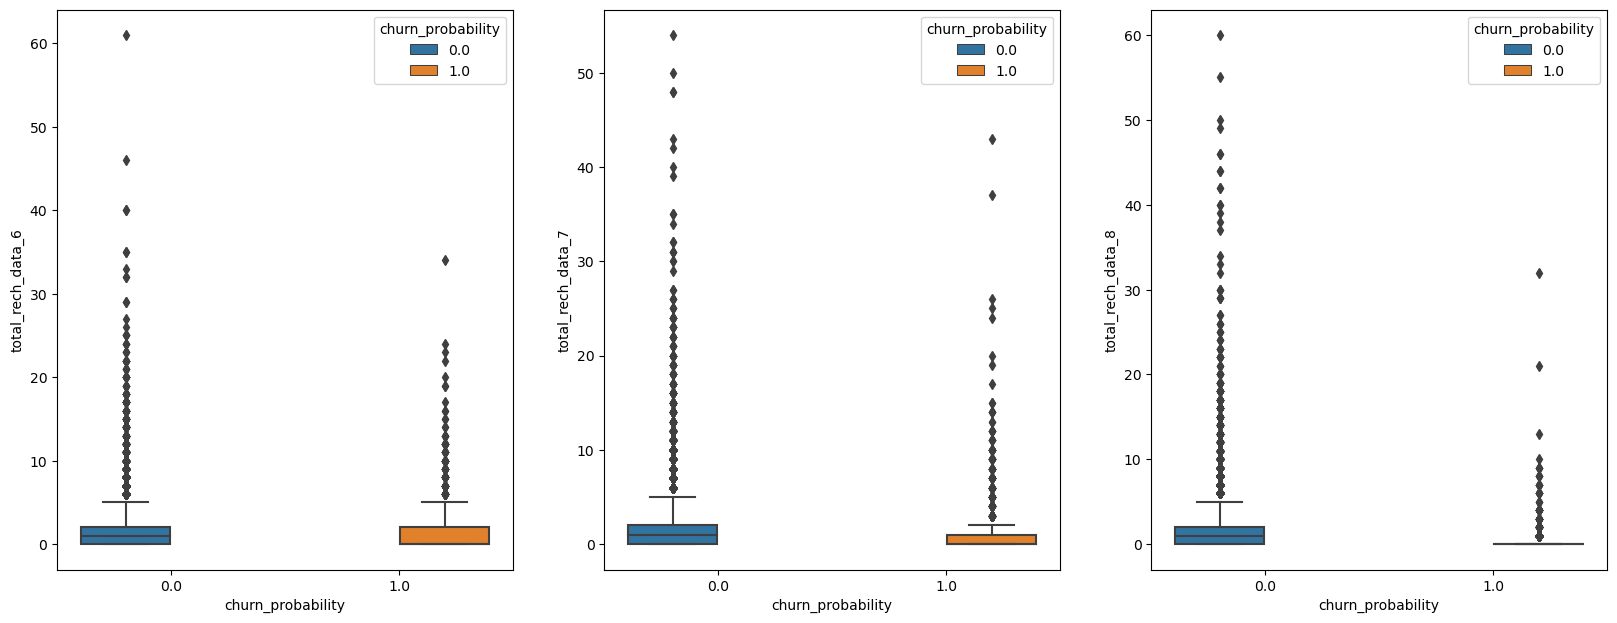

In [290]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df_train_hvc, y="total_rech_data_6", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,2)
sns.boxplot(data=df_train_hvc, y="total_rech_data_7", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,3)
sns.boxplot(data=df_train_hvc, y="total_rech_data_8", x="churn_probability", hue="churn_probability")
plt.show()

This shows that there are lots of outliers.

So first lets remove the outliers

In [ ]:
# for col in num_cols:
#     Q1 = df_train_hvc[col].quantile(0.25)
#     Q3 = df_train_hvc[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_range = Q1 - 1.5 * IQR
#     higher_range = Q3 + 1.5 * IQR
#     df = df_train_hvc.loc[(df_train_hvc[col] > lower_range) & (df_train_hvc[col] < higher_range)]
    
# df.shape

In [ ]:
# plt.figure(figsize=(20,16))
# plt.subplot(2,3,1)
# sns.boxplot(data=df, y="total_rech_amt_data_6", x="churn_probability", hue="churn_probability")
# plt.subplot(2,3,2)
# sns.boxplot(data=df, y="total_rech_amt_data_6", x="churn_probability", hue="churn_probability")
# plt.subplot(2,3,3)
# sns.boxplot(data=df, y="total_rech_amt_data_6", x="churn_probability", hue="churn_probability")
# plt.show()

In [306]:
def remove_outliers(col, k=3):
    upl = col.median() + k*col.std()
    lpl = col.median() - k*col.std()
    col[col<lpl] = lpl
    col[col>upl] = upl
    return col

In [307]:
df = df_train_hvc

df[num_cols] = df[num_cols].apply(remove_outliers, axis=0)

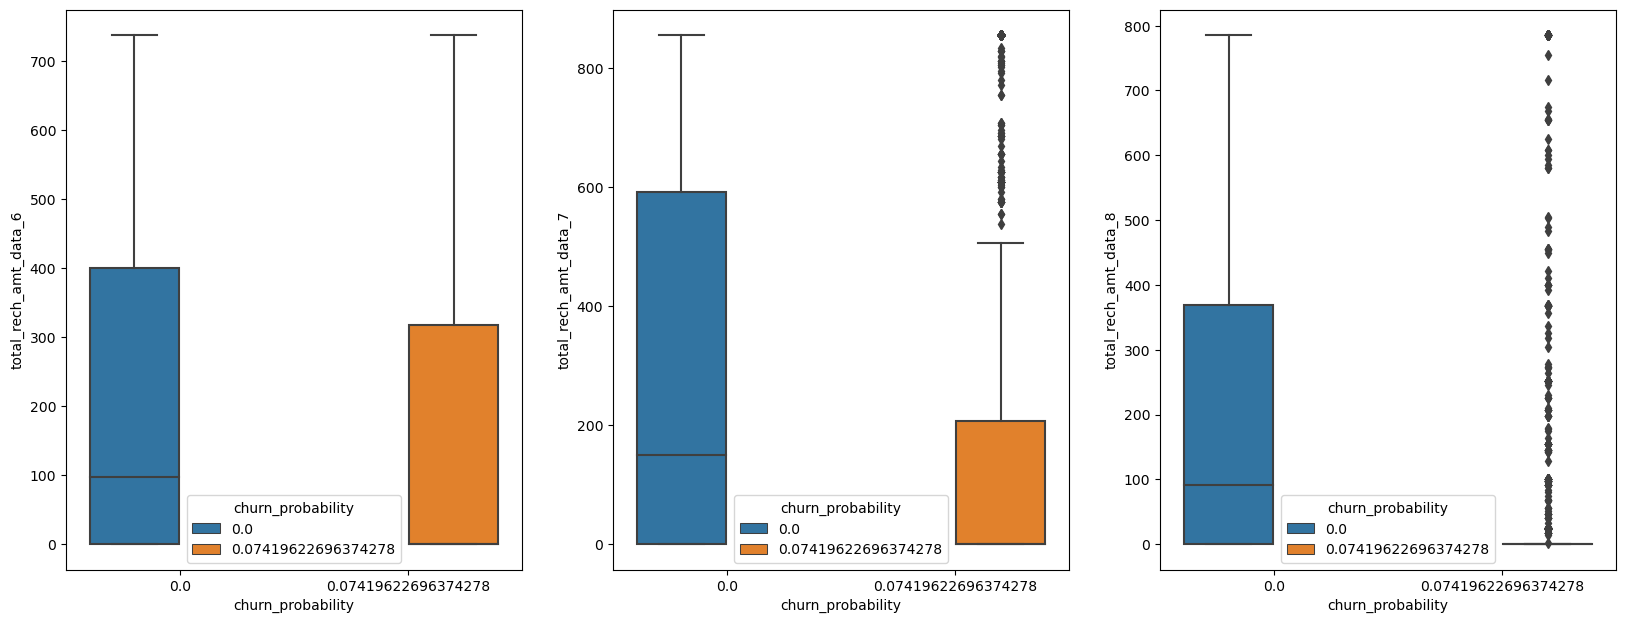

In [310]:
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df, y="total_rech_amt_data_6", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,2)
sns.boxplot(data=df, y="total_rech_amt_data_7", x="churn_probability", hue="churn_probability")
plt.subplot(2,3,3)
sns.boxplot(data=df, y="total_rech_amt_data_8", x="churn_probability", hue="churn_probability")
plt.show()

In [298]:
num_cols

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'l

<Axes: xlabel='churn_probability', ylabel='vol_2g_mb_6'>

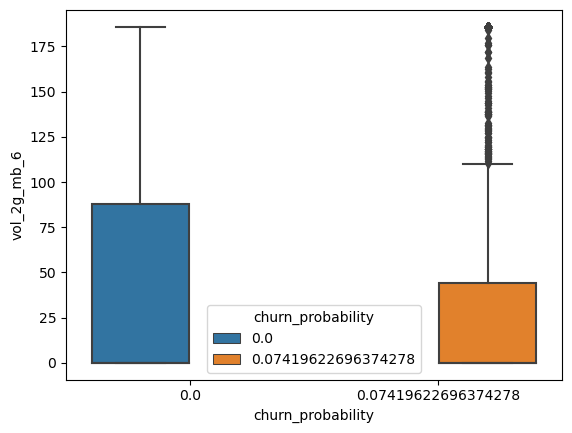

In [309]:
sns.boxplot(data=df, y="vol_2g_mb_6", x="churn_probability", hue="churn_probability")